# Kir Population Analysis
### Notebook for preprocessing and analyzing population datasets from kir expressing mice

In [1]:
# Configure Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import packages and modules
import os
import numpy as np

from Lab_Analyses.Population_Analysis.preprocess_kir_population_data import organize_kir_population_data as preprocessing
from Lab_Analyses.Population_Analysis.analyze_kir_population_data import analyze_kir_population_data as analysis
from Lab_Analyses.Population_Analysis.plot_kir_population_data import plot_kir_population_data as plotting

%matplotlib inline

## Datasets

In [3]:
# Specify mice to analyze
id_1 = "JW223"
id_2 = "JW225"
id_3 = "JW227"

mouse_list = [id_1, id_2, id_3]

# Additional parameters
channels = {"Functional": "GreenCh", "Expression": "RedCh"}

## Preprocessing

In [4]:
for mouse in mouse_list:
    preprocessing(mouse, channels=channels, save=True)

--------------------------------------------------
Processing Mouse JW223
- Preprocessing FOV3
- Preprocessing FOV4
--------------------------------------------------
Processing Mouse JW225
- Preprocessing FOV1
- Preprocessing FOV2
- Preprocessing FOV3
- Preprocessing FOV4
--------------------------------------------------
Processing Mouse JW227
- Preprocessing FOV1
- Preprocessing FOV2


## Perform Analysis

In [5]:
analyzed_data = analysis(mouse_list, save=True)

----------------------------------------
- Analyzing JW223
----------------------------------------
- Analyzing JW225
----------------------------------------
- Analyzing JW227
Saving Grouped data


## Visualize the data

In [6]:
print(analyzed_data.dFoF.shape)
print(len(analyzed_data.kir_ids))
print(analyzed_data.expression_intensity.shape)

(10177, 538)
538
(538,)


kir postive: 131
kir negative: 407
(0, 233.33333333333334)


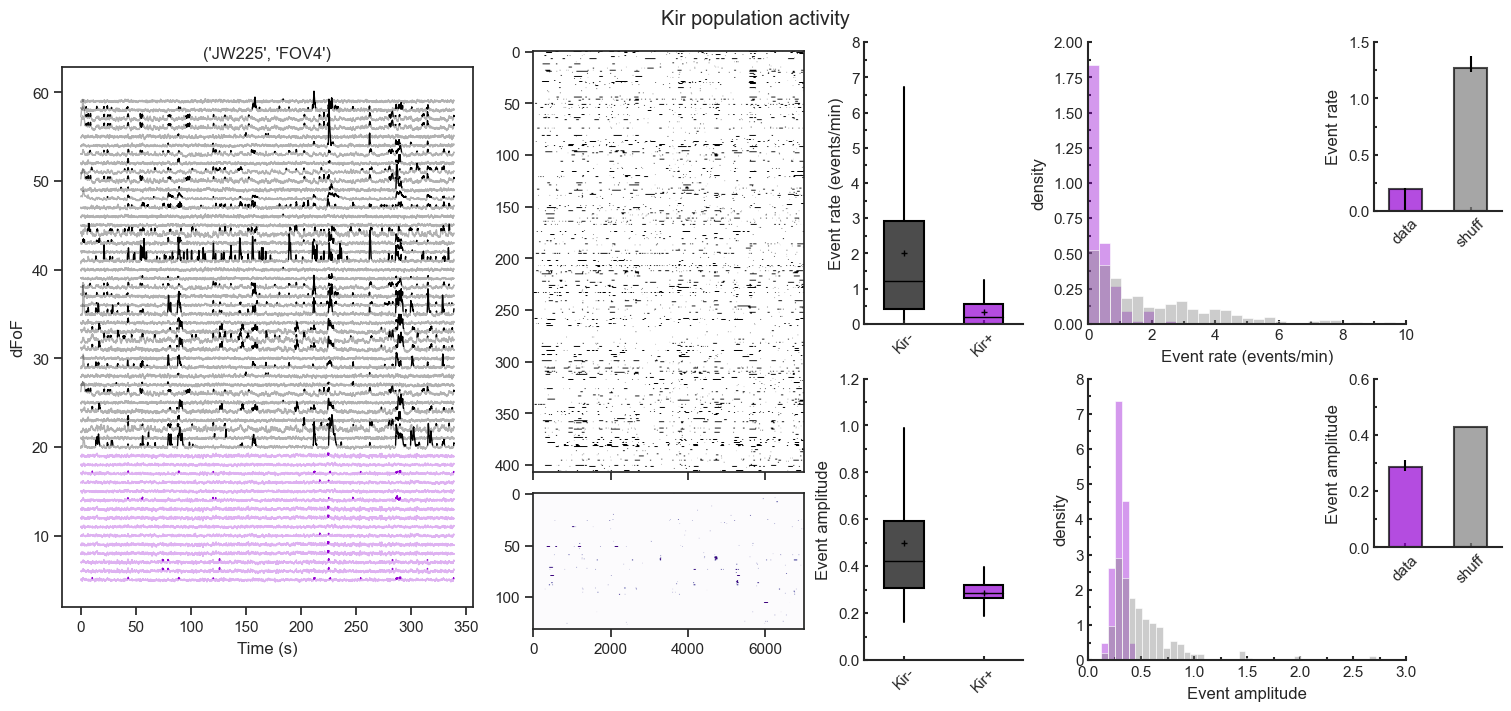

In [7]:
figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\Kir_Population_Data"

plotting(
    dataset=analyzed_data,
    figsize=(15,7),
    trace_type="processed_dFoF",
    trace_data=("JW225", "FOV4"),
    trace_len=None,
    hmap_data=None,
    hmap_len=7000,
    hist_bins=40,
    showmeans=True,
    test_type="nonparametric",
    display_stats=True,
    save=True,
    save_path=figure_path
)